# C-TAEA


This algorithm is implemented based on <cite data-cite="ctaea"></cite> and the authors' [implementation](https://cola-laboratory.github.io/docs/publications/). The algorithm is based on [Reference Directions](../misc/reference_directions.ipynb) which need to be provided when initializing the algorithm object.

C-TAEA follows a two archive approach to balance convergence (Convergence Archive CA) and diversity (Diversity Archive DA).

In [1]:
from pymoo.algorithms.ctaea import CTAEA
from pymoo.factory import get_problem, get_reference_directions
from pymoo.optimize import minimize

problem = get_problem("c1dtlz1", None, 3, k=5)
ref_dirs = get_reference_directions("das-dennis", 3, n_partitions=12)

algorithm = CTAEA(
    ref_dirs,
    seed=1
)

res = minimize(problem, algorithm, termination=('n_gen', 400))

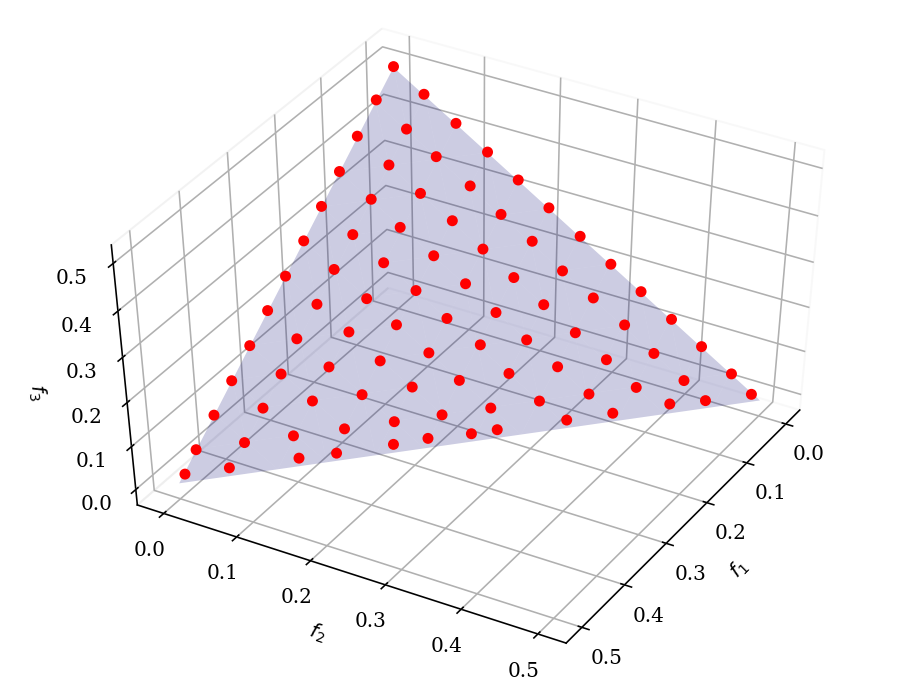

In [2]:
from pymoo.factory import get_visualization

pf = problem.pareto_front(ref_dirs)

sc = get_visualization("scatter", legend=False, angle=(45, 30))
sc.add(pf, plot_type='surface', alpha=0.2, label="PF", color="blue")
sc.add(res.F, color="red")
sc.show()

## API

Python implementation by [cyrilpic](https://github.com/cyrilpic) based on the [original C code](https://cola-laboratory.github.io/docs/publications/).